This notebook trains a neural network and then scores it on a test set. It then plots the weights and does the optimisation of the inputs and plots it as a network. It then checks if every neuron in the network reaches an activation of 1 and 0 at some point in the data set. Then, it checks which structures make each neuron have an activation of 1. These structures are then written to a file in xyz format so that they can be visualised in VMD. 

In [2]:
import joblib
import sys
sys.path.insert(0,'/Users/walfits/Repositories/Aglaia/')
import energies_NN as nn
import numpy as np
from sklearn import model_selection as modsel

In [3]:
# Loading the data
data = joblib.load("cc_kjmol_invdist.bz")
X = data["X"]
y = np.reshape(data["y"], (data["y"].shape[0],))

In [4]:
data_2 = joblib.load("cartesian_and_descriptor.bz")
X_cartesian = data_2["X_cartesian"]
X_descriptor = data_2["X_id"]

In [5]:
# Splitting the data
X_train, X_test, y_train, y_test = modsel.train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)

(16558, 21)


In [6]:
n_nodes = 12

In [7]:
# Training the model
estimator = nn.Energies_NN(max_iter=20000, learning_rate_init=0.04, hidden_layer_sizes=(12,), batch_size=1000, 
                           alpha= 0.00054, alpha_l1=0.0, tensorboard=False)

In [8]:
estimator.fit(X_train, y_train)

(0.95213359960883093, 16.97797331706499, 12.707280200324908, 88.986299925949425, 114.39093170192791)


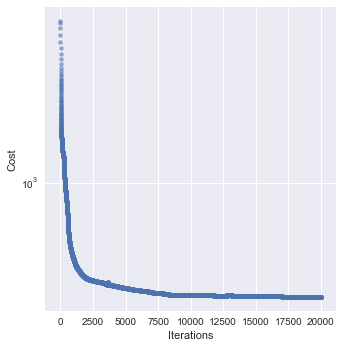

In [30]:
print(estimator.scoreFull(X_test, y_test))
estimator.plot_cost()

/Users/walfits/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


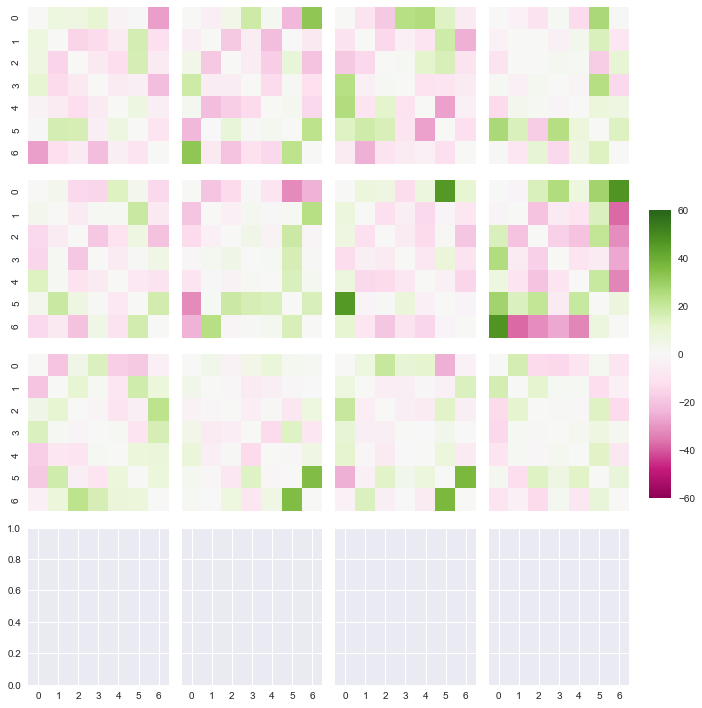

In [31]:
estimator.plotWeights(show_fig=True, with_diag=False)

In [32]:
import matplotlib.pyplot as plt
import networkx as nx

the_mean = np.mean(X_descriptor, axis=0)
# the_mean = np.zeros(21)
# the_mean = X_descriptor[0]
np.random.seed(seed=1)
random_input = np.random.rand(21)

alpha_l1 = [0.0]
alpha_l2 = 0

# estimator.optimise_input_no_diag(random_input, alpha_l1, alpha_l2, the_mean, 6000, 0.0005)
estimator.optimise_input(random_input, alpha_l1, alpha_l2, the_mean, 15000, 0.0005, with_diag=False)
matrix = estimator.x_square_tot

The activations at the end of the optimisations are:
[array([[ 0.99999964]], dtype=float32), array([[ 0.99999928]], dtype=float32), array([[ 0.99999893]], dtype=float32), array([[ 0.99999976]], dtype=float32), array([[ 0.99999976]], dtype=float32), array([[ 1.]], dtype=float32), array([[ 1.]], dtype=float32), array([[  1.47152246e-18]], dtype=float32), array([[ 1.]], dtype=float32), array([[ 0.99998164]], dtype=float32), array([[ 0.99999952]], dtype=float32), array([[ 0.99999988]], dtype=float32)]


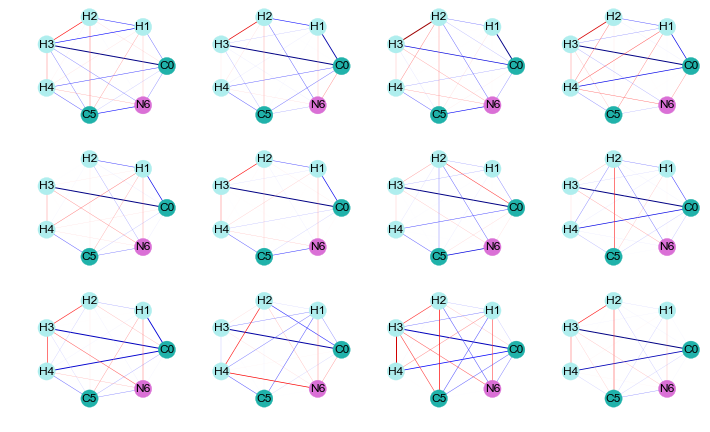

In [33]:
n = int(np.ceil(np.sqrt(estimator.hidden_layer_sizes)))

fig = plt.figure(figsize=(12, 10))
for i in range(n**2):
    if i >= estimator.hidden_layer_sizes[0]:
        break
    fig.add_subplot(n,n,1+i)
    A = np.matrix(matrix[i])
    graph2 = nx.from_numpy_matrix(A, parallel_edges=False)
    

    labels = {}
    labels[0] = 'C0'
    labels[1] = 'H1'
    labels[2] = 'H2'
    labels[3] = 'H3'
    labels[4] = 'H4'
    labels[5] = 'C5'
    labels[6] = 'N6'

    colors = ["lightseagreen", "paleturquoise", "paleturquoise", "paleturquoise", "paleturquoise", "lightseagreen", "orchid"]

    # edges widths
    edgewidth = [abs(d['weight']) for (u, v, d) in graph2.edges(data=True)]
    if len(edgewidth) > 0:
        if len(edgewidth)==1:
            norm_fact = edgewidth[0]
        else:
            norm_fact = max(edgewidth)
        edge_std_list = np.ones(len(edgewidth)) * norm_fact
        edgewidth = edgewidth/edge_std_list
        
    # Added so that the negative and positive features have different colours     
    edgecolours = [d['weight'] for (u, v, d) in graph2.edges(data=True)]

    plt.axis('off')
    nx.draw_circular(graph2,
                     width=edgewidth,
                     with_labels=True, 
                     labels=labels, 
                     node_color=colors,
                     edge_color=edgecolours, 
                     edge_cmap=plt.cm.seismic,
                     edge_vmin=-1,
                     edge_vmax=1
                     )

# plt.savefig("mod1tot_noweight.png", dpi=200)  # save as png

plt.show()  # display

In [9]:
# Calculating the activations of all the nodes
activations = estimator.max_act(X_descriptor)
print(activations.shape)

(17864, 12)


In [10]:
# The maximum and minimum activation for each neuron
for i in range(n_nodes):
    print("The max and min activations for neuron " + str(i) + " are:")
    print(max(activations[:,i]), min(activations[:,i]))

The max and min activations for neuron 0 are:
1.0 2.7393e-19
The max and min activations for neuron 1 are:
1.0 3.83777e-10
The max and min activations for neuron 2 are:
1.0 1.26895e-21
The max and min activations for neuron 3 are:
1.0 1.65375e-17
The max and min activations for neuron 4 are:
1.0 2.39419e-16
The max and min activations for neuron 5 are:
1.0 6.48724e-11
The max and min activations for neuron 6 are:
1.0 1.04304e-13
The max and min activations for neuron 7 are:
0.995939 5.69913e-31
The max and min activations for neuron 8 are:
1.0 3.35792e-16
The max and min activations for neuron 9 are:
1.0 6.86903e-12
The max and min activations for neuron 10 are:
1.0 3.63207e-13
The max and min activations for neuron 11 are:
0.999943 1.07233e-18


In [11]:
# The index that gives the max and min activation for each neuron
max_act_idx = []
for i in range(n_nodes):
    print("The max and min activations for neuron " + str(i) + " are:")
    print(np.argmax(activations[:,i]), np.argmin(activations[:,i]))
    max_act_idx.append(np.argmax(activations[:,i]))

The max and min activations for neuron 0 are:
9579 13973
The max and min activations for neuron 1 are:
149 13985
The max and min activations for neuron 2 are:
9587 3693
The max and min activations for neuron 3 are:
10319 14142
The max and min activations for neuron 4 are:
9602 2146
The max and min activations for neuron 5 are:
10 14120
The max and min activations for neuron 6 are:
10348 15568
The max and min activations for neuron 7 are:
14129 14142
The max and min activations for neuron 8 are:
1945 16556
The max and min activations for neuron 9 are:
6203 14149
The max and min activations for neuron 10 are:
11361 14125
The max and min activations for neuron 11 are:
16546 12057


In [12]:
max_act_idx = []
for i in range(n_nodes):
    max_act = np.amax(activations[:,i])
    max_act_idx_node = np.argwhere(activations[:,i] == max_act)
    max_act_idx.append(max_act_idx_node)

In [13]:
max_act_idx_lst = []
for j in range(n_nodes):
    max_act_node = []
    for i in range(max_act_idx[j].shape[0]):
        max_act_node.append(max_act_idx[j][i][0])
    max_act_idx_lst.append(max_act_node)

In [21]:
len(max_act_idx_lst[9])

25

In [22]:
max_act_f = open("max_act_struct.xyz", "w")
node = 9
for idx in max_act_idx_lst[node]:
    max_act_f.write("7")
    max_act_f.write("\n\n")
    
    for i in range(0,28,4):
        for j in range(4):
            max_act_f.write(str(X_cartesian[idx][i+j]) + "\t")
        max_act_f.write("\n")

max_act_f.close()